In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import sys
from gen_catalyst_design.db import Database, get_atoms_list_db, load_data_from_db
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os

In [6]:
miller_index = "100"
pth_header = f"../../../../results/random_search/results/Rh_Cu_Au_Pd/miller_index_{miller_index}"
run_ids = [0,1,2]
datadicts = []
for run_id in run_ids:
    filename = f"runID_{run_id}_results.db"
    database = Database.establish_connection(filename=filename, miller_index=miller_index, pth_header=pth_header)
    datadicts += load_data_from_db(database=database)

rates = np.array([datadict["rate"] for datadict in datadicts])
print(np.max(rates))
datadicts = sorted(datadicts, key=lambda xx: xx["rate"], reverse=False)
print(datadicts[0]["rate"])

19.029342590393412
2.7071070632435837e-10


[ 1.   3.5  6.   8.5 11.  13.5 16.  18.5 21. ]


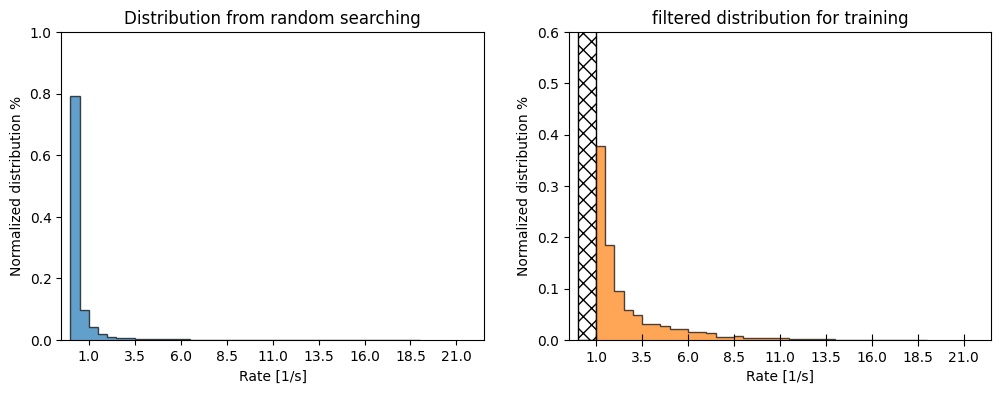

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,4), sharex=True)
rates = np.array([datadict["rate"] for datadict in datadicts])
rate_interval = 0.5
rate_max = np.max(rates)


i = 0
hist_prior = None
y_lims = [1.0, 0.6]
titles = [
    "Distribution from random searching",
    "filtered distribution for training"
]

step = 2.5
classes = np.arange(1.0, np.ceil(rate_max)+step, step)
for ax, rate_min, color in zip(axs, [0.0, 1.0], ["C0", "C1"]):
    bins = np.arange(rate_min, rate_max, rate_interval)
    hist, edges = np.histogram(rates, bins=bins)
    hist_norm = hist/np.sum(hist)
    if i == 1:
        ax.bar(0.5, 1.0, width=1.0, fill=False, hatch="xx")
        ax.set_xticks(classes)
        ax.tick_params(axis='x', direction='inout', length=8)
        #for val in classes:
        #    ax.set_xticks()
            #ax.vlines(x=val, ymin=0.0, ymax=0.05, colors="k", linewidth=1)
        #    ax.tick_params(axis='x', direction='inout')
    #else:
    ax.stairs(hist_norm, edges=edges, fill=True, alpha=0.7, edgecolor="k", linewidth=1, color=color)
    ax.set_title(titles[i])
    ax.set_xlim([-0.5, np.ceil(rate_max)+step])
    ax.set_ylim([0.0, y_lims[i]])
    ax.set_ylabel("Normalized distribution %")
    ax.set_xlabel("Rate [1/s]")
    i+=1

In [8]:
def load_rates_from_file(
    filename:str,
    pth_header:str,
    ):
    database = Database.establish_connection(
        filename=filename,
        miller_index="100",
        pth_header=pth_header
    )
    datadicts = load_data_from_db(database=database)
    rates = np.array([datadict["rate"] for datadict in datadicts])
    return rates


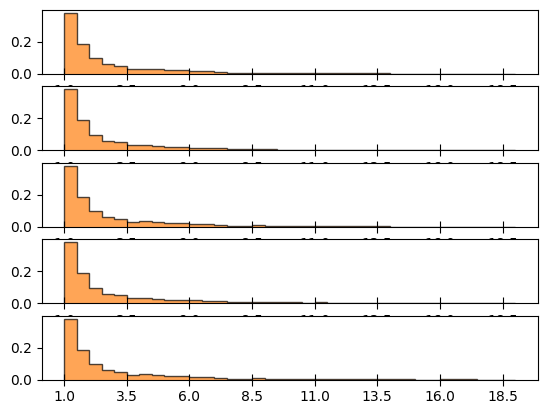

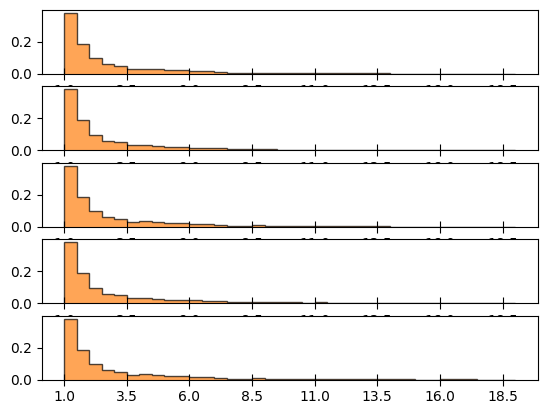

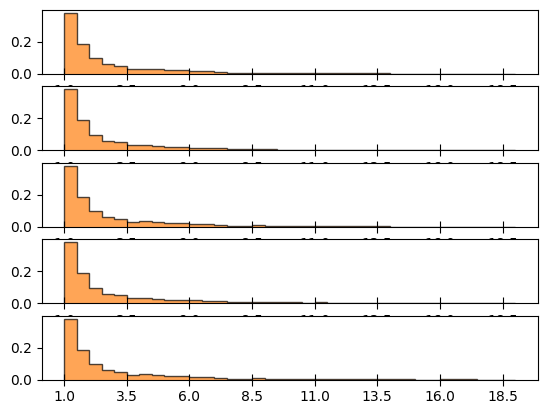

In [ ]:
rates = np.array([datadict["rate"] for datadict in datadicts])
rate_interval = 0.5
rate_max = np.max(rates)

classes = np.arange(1.0, np.ceil(rate_max)+step, step)
bins = np.arange(rate_min, rate_max, rate_interval)
hist, edges = np.histogram(rates, bins=bins)
hist_norm = hist/np.sum(hist)

classes_for_plot = [0, 2, 4]

samples_dir = "model_001/rate_evals"
for cls in classes_for_plot:
    fig, axs = plt.subplots(5,1, figsize=(5,20), sharex=True)
    for ax in axs:
        ax.set_xticks(classes)
        ax.tick_params(axis='x', direction='inout', length=8)
        ax.stairs(hist_norm, edges=edges, fill=True, alpha=0.7, edgecolor="k", linewidth=1, color="C1")
    class_path = os.path.join(samples_dir, f"class_{cls}")
    guidance_scales = os.listdir(class_path)
    for filename in guidance_scales:
        rates = 2

